In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df_ = pd.read_csv('AirlineTweets.csv')

In [3]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df_[['airline_sentiment', 'text']].copy()

In [5]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

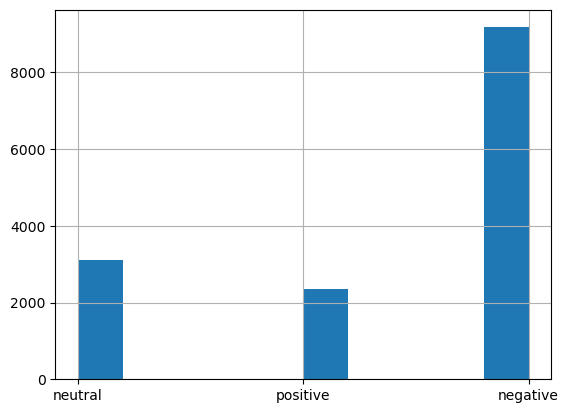

In [6]:
df['airline_sentiment'].hist()

In [7]:
target_map = {'positive' : 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [8]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [9]:
df_train, df_test = train_test_split(df)

In [10]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [11]:
vectorizer = TfidfVectorizer(max_features=2000)

In [12]:
X_train = vectorizer.fit_transform(df_train['text'])

In [13]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157852 stored elements in Compressed Sparse Row format>

In [14]:
X_test = vectorizer.transform(df_test['text'])

In [15]:
Y_train = df_train['target']
Y_test = df_test['target']

In [16]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print('train acc:', model.score(X_train, Y_train))
print('test acc:', model.score(X_test, Y_test))

train acc: 0.8551001821493625
test acc: 0.7978142076502732


In [17]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print('train auc:', roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print('test auc:', roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

train auc: 0.9427155214535131
test auc: 0.8953675693826142


In [18]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [19]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96544214, 0.00827646, 0.0262814 ],
       [0.20022624, 0.69852941, 0.10124434],
       [0.30193548, 0.05075269, 0.64731183]])

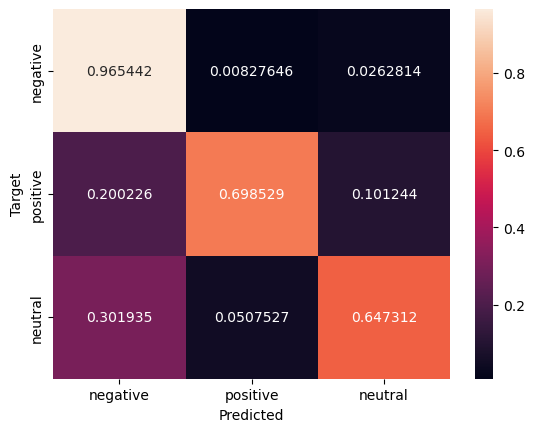

In [21]:
def plot_cm(cm):
    classes = ['negative' , 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')
plot_cm(cm)


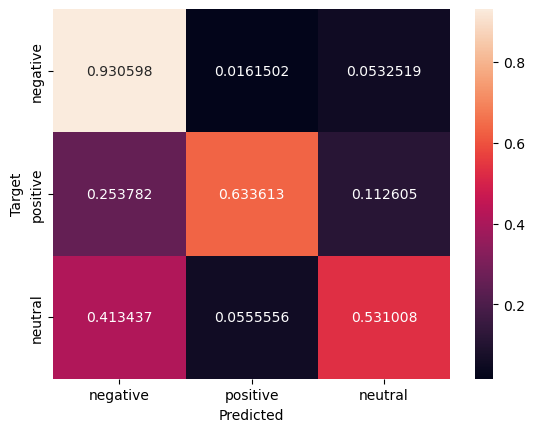

In [22]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

### Binary Labels and Model Interpretation

In [23]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [24]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [25]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [26]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [27]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print('train acc:', model.score(X_train, Y_train))
print('test acc:', model.score(X_test, Y_test))

train acc: 0.9298671288272675
test acc: 0.9147609147609148


In [28]:
Pr_train = model.predict_proba(X_train)[:,1]
Pr_test = model.predict_proba(X_test)[:,1]
print('train auc:', roc_auc_score(Y_train, Pr_train))
print('test auc:', roc_auc_score(Y_test, Pr_test))

train auc: 0.9788753747469657
test auc: 0.9532922029571322


In [29]:
model.coef_

array([[-0.24922949, -0.13419416, -0.34668122, ...,  0.50929767,
         0.00881348, -0.60292764]])

In [30]:
model.coef_.shape

(1, 2000)

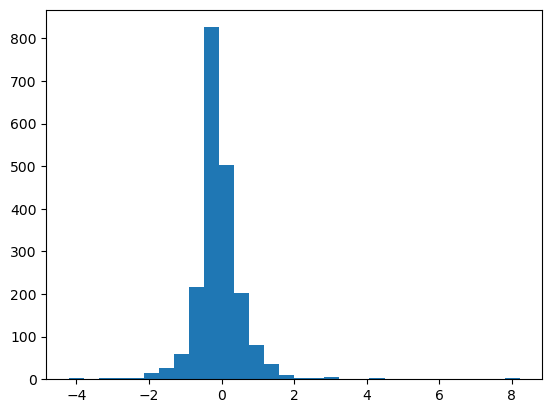

In [32]:
plt.hist(model.coef_[0], bins=30);

In [33]:
word_index_map = vectorizer.vocabulary_

In [41]:
word_index_map.items()

dict_items([('united', 1849), ('change', 338), ('made', 1087), ('in', 938), ('just', 989), ('over', 1271), ('hours', 903), ('for', 745), ('something', 1619), ('that', 1737), ('should', 1575), ('have', 851), ('taken', 1711), ('online', 1246), ('am', 139), ('not', 1213), ('loved', 1076), ('the', 1739), ('agent', 112), ('though', 1755), ('door', 568), ('to', 1775), ('half', 826), ('into', 964), ('plane', 1334), ('seat', 1535), ('be', 235), ('forced', 746), ('always', 138), ('sit', 1591), ('here', 873), ('americanair', 143), ('11', 6), ('out', 1266), ('of', 1227), ('delayed', 497), ('flights', 728), ('you', 1993), ('suck', 1682), ('and', 148), ('getting', 793), ('worse', 1971), ('fair', 670), ('usairways', 1868), ('stuck', 1677), ('need', 1191), ('reflight', 1438), ('booking', 270), ('problems', 1380), ('next', 1199), ('flight', 717), ('possibly', 1359), ('dm', 554), ('more', 1166), ('info', 951), ('southwestair', 1630), ('got', 810), ('help', 867), ('from', 765), ('nice', 1201), ('lady', 

In [42]:
# let's look at the weights for each word
# try it with different threshold values
threshold = 2

print('Most positive words:')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
southwestair 2.9036874181911556
thank 8.09922551479395
great 5.197515002318528
best 3.615329096152718
virginamerica 3.2486443545541444
thx 2.8164212714726697
jetblue 2.9658013858425636
good 3.22799763397652
thanks 8.22206025072253
love 4.3869791709646515
appreciate 2.9640990730187533
awesome 4.07888420699412
cool 2.142839237084984
kudos 2.6562827235306745
amazing 4.243634192708066
worries 2.7418057143224037
wonderful 2.1162782091627794


In [44]:
print('Most negative words:')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
hours -3.1763387533926792
not -4.2078307486479725
delayed -2.7198581042855863
hour -2.060519567168622
but -2.214461066789803
cancelled -2.6628847487506344
nothing -2.1118761839138025
what -2.0074049422027698
no -3.9384141989067
worst -3.2120438023533855
hold -2.7788325482919993
why -2.214354810334347
doesn -2.0250932721961528
luggage -2.1903108180765165
